# Bremsstrahlung


Input:
   * double Z - The charge number of the target atom.
   * double A - The mass number of the target atom, in g/mol
   * double mass - The projectile rest mass, in GeV
   * double K - The projectile initial kinetic energy.
   * double q - The kinetic energy lost to the photon.
   

Output:
    DCS in m^2/kg.

### Definitions and Applicability

Theory from: https://pdg.lbl.gov/2014/AtomicNuclearProperties/adndt.pdf. 

\begin{equation}
\frac{\text{d}\sigma}{\text{d}\nu} = \left.\frac{\text{d}\sigma}{\text{d}\nu}\right|_\text{brems, elec} + \left.\frac{\text{d}\sigma}{\text{d}\nu}\right|_\text{brems, nucl}
\end{equation}

The differential cross section for muon bremsstrahlung from a (screened) nucleus is used for the present paper:

\begin{equation}
\left.\frac{\text{d}\sigma}{\text{d}\nu}\right|_\text{brems, nucl} = \alpha(2Z\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)\Phi_n(\delta)
\end{equation}

To account for bremsstrahlung losses on atomic electrons. Approximation for the contribution from electrons, taking into account electronic binding and recoil, is 

\begin{equation}
\left.\frac{\text{d}\sigma}{\text{d}\nu}\right|_\text{brems, elec} = \alpha Z(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)\Phi_\text{in}(\delta)
\end{equation}

\begin{equation}
\frac{\text{d}\sigma}{\text{d}\nu} = \alpha Z(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) )
\end{equation}
 
Here $\nu = \frac{q}{E}$ is the fraction of the muon's energy transferred to the photon, and 


\begin{equation}
\Phi(\delta) = \ln(\frac{BZ^{\frac{-1}{3}}(M_\mu + \delta(D_n\sqrt{e} - 2))}{(m_e + \delta \sqrt{e}BZ^{\frac{-1}{3}})D_n},
\end{equation}


where $D_n = 1.54A^{0.27}$ , $B = 182.7$ ($B = 202.4$ for hygrogen), $e = 2.7181...$ and

\begin{equation}
\delta = \frac{M_\mu^{2}\nu}{2E(1 - \nu)}
\end{equation}

\begin{equation}
\Phi_\text{in}(\delta) = \ln(\frac{M_\mu BZ^{-2/3} \sqrt{e}}{(m_e + \delta  BZ^{-2/3} \sqrt{e})(\frac{M_\mu \delta}{m_e^{2}} + \sqrt{e})}),
\end{equation}

where $B = 1429$ for all elements but hydrogen, where $B = 446$

For our calculations we use differential cross section, as 
\begin{equation}
\frac{\text{d} \sigma}{\text{d} q} = \frac{\text{d}\sigma}{\text{d}\nu E}
\end{equation}
This formula takes the form:
\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{\alpha Z}{E}(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) )
\end{equation}
But, this DCS in $\frac{m^2}{Gev}$. We need to multiply by Avogadro's number, energy and divide by the mass number of the target atom to get DCS in $\frac{m^2}{kg}$.

The final formula:
\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{\alpha Z}{E}(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) ) \frac{N_a E}{A}
\end{equation}

And take into account, that A in g/mol

\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{\alpha Z}{E}(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) ) \frac{1000 N_a E}{A}
\end{equation}

In [ ]:
me = 0.511e-3 #Electron mass in GeV
sqrte = 1.648721271

$\sqrt{e}$

In [ ]:
phie_factor = mu / (me * me * sqrte)  # mu - The projectile rest mass, in GeV (Muon mass) #Gev^{-1}

\begin{equation}
\phi_\text{factor} = \frac{M_\mu}{m_e^{2}\sqrt{e}}
\end{equation}

In [ ]:
rem = 5.63588E-13 * me / mu # m

\begin{equation}
rem = 2r_e\frac{m_e}{M_\mu}
\end{equation}

$r_e = 2.8179403262 * 10^{-15} m$ - classical electron radius

$M_\mu$ - muon mass in GeV

In [ ]:
BZ_n = (202.4 if Z == 1 else 182.7) * pow(Z, -1. / 3.)
BZ_e = (446.0 if Z == 1 else 1429.0) * pow(Z, -2. / 3.)
D_n = 1.54 * pow(A, 0.27)
E = K + mu

In [ ]:
dcs_factor = 7.297182E-07 * rem * rem * Z / E  # m^2 or m^2/GeV

\begin{equation}
\text{dcs_factor} = \frac{\alpha Z}{E} (2r_e\frac{m_e}{M_\mu})^{2}
\end{equation}

$\alpha = 0.0072973525628(6)$ - fine structure constant

In [ ]:
delta_factor = 0.5 * mu * mu / E #GeV

In [ ]:
qe_max = E / (1. + 0.5 * mu * mu / (me * E)) #GeV

\begin{equation}
qe_\text{max} = \frac{E}{1 + \frac{M_\mu^2}{2m_eE}}
\end{equation}

In [ ]:
nu = q / E

In [ ]:
delta = delta_factor * nu / (1. - nu) #GeV

\begin{equation}
\delta = \frac{M_\mu^{2}\nu}{2E(1 - \nu)}
\end{equation}

In [ ]:
Phi_e = 0.0

In [ ]:
Phi_n = math.log(BZ_n * (mu + delta * (D_n * sqrte - 2.)) / (D_n * (me + delta * sqrte * BZ_n)))

\begin{equation}
\Phi_n(\delta) = \ln(\frac{BZ^{\frac{-1}{3}}(M_\mu + \delta(D_n\sqrt{e} - 2))}{(m_e + \delta \sqrt{e}BZ^{\frac{-1}{3}})D_n}
\end{equation}

In [ ]:
if Phi_n < 0.0:
    Phi_n = 0.0
if q < qe_max:
    Phi_e = math.log(BZ_e * mu / ((1. + delta * phie_factor) * (me + delta * sqrte * BZ_e)))        
    if (Phi_e < 0.):
            Phi_e = 0.0
else:
    Phi_e = 0.0

Phi_e:
\begin{equation}
\Phi_\text{in}(\delta) = \ln(\frac{M_\mu BZ^{-2/3} \sqrt{e}}{(m_e + \delta  BZ^{-2/3} \sqrt{e})(\frac{M_\mu \delta}{m_e^{2}} + \sqrt{e})})
\end{equation}

\begin{equation}
\Phi_\text{in}(\delta) = \ln(\frac{M_\mu BZ^{-2/3} }{(m_e + \delta  BZ^{-2/3} \sqrt{e})(\frac{M_\mu \delta}{m_e^{2}\sqrt{e}} + 1)})
\end{equation}

\begin{equation}
\Phi_\text{in}(\delta) = \ln(\frac{M_\mu BZ^{-2/3} }{(m_e + \delta  BZ^{-2/3} \sqrt{e})(\phi_\text{factor} \delta + 1)})
\end{equation}

In [ ]:
dcs = dcs_factor * (Z * Phi_n + Phi_e) * (4. / 3. * (1. / nu - 1.) + nu)


\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{\alpha Z}{E}(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) )
\end{equation}

In [ ]:
return 0.0 if dcs < 0.0 else dcs * 1E+3 * double(AVOGADRO_NUMBER) * (mu + K) / A #The differential cross section in m^2/kg.

\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{\alpha Z}{E}(2\frac{m_e}{M_\mu})^{2}(\frac{4}{3}(\frac{1}{\nu} - 1) + \nu)(\Phi_\text{in}(\delta) + Z\Phi_n(\delta) ) \frac{1000 N_a E}{A}
\end{equation}

### Usage example

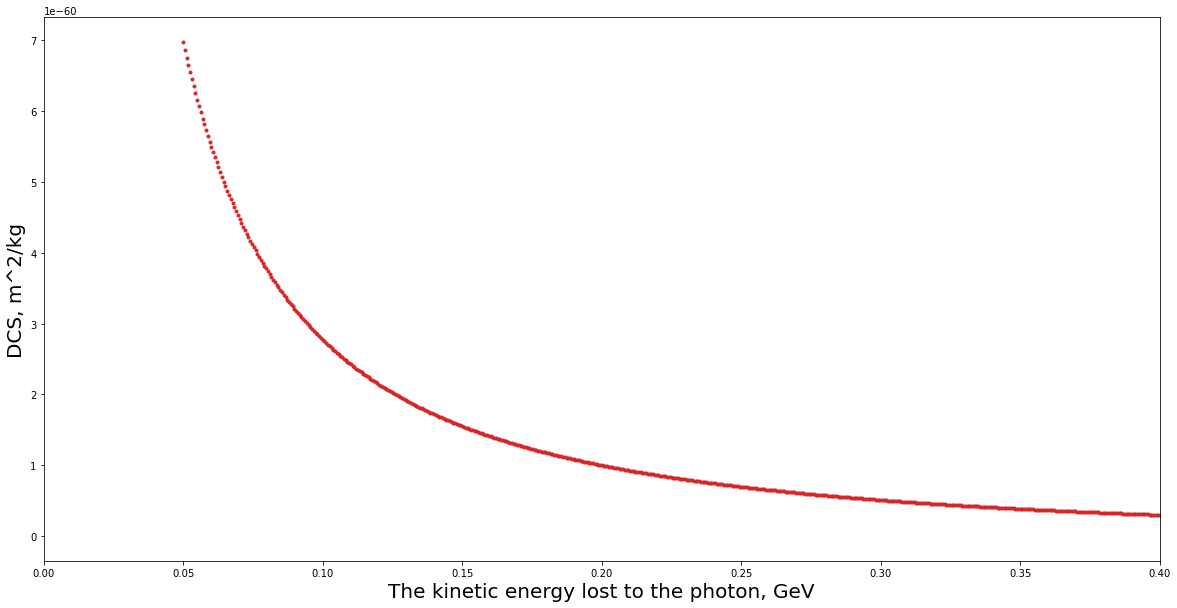

In [2]:
import constants
import math
from numba import njit, double, int32



@njit(double(double, double, double, int32, double))
def bremsstrahlung(K, q, A, Z, mu):
    me = constants.ELECTRON_MASS
    sqrte = 1.648721271
    phie_factor = mu / (me * me * sqrte)
    rem = 5.63588E-13 * me / mu

    BZ_n = (202.4 if Z == 1 else 182.7) * pow(Z, -1. / 3.)
    BZ_e = (446.0 if Z == 1 else 1429.0) * pow(Z, -2. / 3.)
    D_n = 1.54 * pow(A, 0.27)
    E = K + mu
    dcs_factor = 7.297182E-07 * rem * rem * Z / E

    delta_factor = 0.5 * mu * mu / E
    qe_max = E / (1. + 0.5 * mu * mu / (me * E))

    nu = q / E
    delta = delta_factor * nu / (1. - nu)
    Phi_e = 0.0
    Phi_n = math.log(BZ_n * (mu + delta * (D_n * sqrte - 2.)) / (D_n * (me + delta * sqrte * BZ_n)))
    if Phi_n < 0.0:
        Phi_n = 0.0
    if q < qe_max:
        Phi_e = math.log(BZ_e * mu / ((1. + delta * phie_factor) * (me + delta * sqrte * BZ_e)))
        if (Phi_e < 0.):
            Phi_e = 0.0
    else:
        Phi_e = 0.0

    dcs = dcs_factor * (Z * Phi_n + Phi_e) * (4. / 3. * (1. / nu - 1.) + nu)
    return 0.0 if dcs < 0.0 else dcs * 1E+3 * double(constants.AVOGADRO_NUMBER) * (mu + K) / A


@njit('(float64[:], float64[:], float64[:], float64, int32, float64)')
def _vmap_bremsstrahlung(
        result,
        kinetic_energies,
        recoil_energies,
        atomic_mass,
        atomic_number,
        particle_mass):
    n = result.shape[0]
    for i in range(n):
        result[i] = bremsstrahlung(
            kinetic_energies[i],
            recoil_energies[i],
            atomic_mass,
            atomic_number,
            particle_mass)
    return result


def vmap_bremsstrahlung(
        kinetic_energies,
        recoil_energies,
        atomic_mass,
        atomic_number,
        particle_mass):
    result = torch.zeros_like(kinetic_energies)
    _vmap_bremsstrahlung(
        result.numpy(),
        kinetic_energies.numpy(),
        recoil_energies.numpy(),
        atomic_mass,
        atomic_number,
        particle_mass)
    return result

import numpy as np
import matplotlib.pyplot as plt
E = 2
sample = 1500
X = []
Y = []
for i in range(sample):
    x = 0.05 + i*(1 - 0.05)/sample;
    y = bremsstrahlung(1, x, 22, 11, 0.10565839)
    X.append(x)
    Y.append(y)
    

fig, ax = plt.subplots()
ax.plot(X, Y, '.C3')    
plt.xlim([0.,0.4])

ax.set_xlabel('The kinetic energy lost to the photon, GeV', fontsize = 20)
ax.set_ylabel('DCS, m^2/kg', fontsize = 20)

fig.set_figwidth(20)
fig.set_figheight(10)
    
plt.show()   